# Homework 2

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
climate = pd.read_csv('ClimateData.csv')

In [144]:
climate

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


### 1. Please take a look at the data types and summary of our variables.

In [145]:
columns = list(climate.columns)

In [146]:
for i in columns:
    print('{}:'.format(i),type(climate[i][0]),'\n')

id: <class 'numpy.int64'> 

building_class: <class 'str'> 

floor_area: <class 'numpy.float64'> 

year_built: <class 'numpy.float64'> 

precipitation_inches: <class 'numpy.float64'> 

snowfall_inches: <class 'numpy.float64'> 

avg_temp: <class 'numpy.float64'> 

days_with_fog: <class 'numpy.float64'> 

site_eui: <class 'numpy.float64'> 



In [147]:
cat = ['building_class']
quant = list(set(columns).difference(cat+['id']))

In [148]:
cat

['building_class']

In [149]:
quant

['days_with_fog',
 'snowfall_inches',
 'site_eui',
 'floor_area',
 'avg_temp',
 'year_built',
 'precipitation_inches']

### 2.Summarize the number of unique values in each column.

In [150]:
for v in columns:
    print('unique variables for {}:\n{}\n'.format(v,climate[v].unique()))
    print('Summary of unique variables in column {}:\n{}\n'.format(v,climate[v].value_counts()))

unique variables for id:
[    0     1     2 ... 75754 75755 75756]

Summary of unique variables in column id:
0        1
50493    1
50509    1
50508    1
50507    1
        ..
25252    1
25251    1
25250    1
25249    1
75756    1
Name: id, Length: 75757, dtype: int64

unique variables for building_class:
['Commercial' 'Residential']

Summary of unique variables in column building_class:
Residential    43558
Commercial     32199
Name: building_class, dtype: int64

unique variables for floor_area:
[ 61242. 274000. 280025. ... 103345.  36353.  40489.]

Summary of unique variables in column floor_area:
60000.0     264
70000.0     213
80000.0     176
75000.0     173
72000.0     173
           ... 
450500.0      1
354100.0      1
123290.0      1
133280.0      1
40489.0       1
Name: floor_area, Length: 20433, dtype: int64

unique variables for year_built:
[1942. 1955. 1951. 1980. 1985. 1956. 1982. 1947. 1929. 1979. 1927. 1960.
 1924.   nan 1949. 1926. 1914. 1973. 1900. 1913. 1962. 1989. 196

### 3.Check at descriptive statistics for the Dataset.

In [151]:
climate[quant].describe()

,days_with_fog,snowfall_inches,site_eui,floor_area,avg_temp,year_built,precipitation_inches
count,29961.000000,75757.000000,75757.000000,7.575700e+04,75757.000000,73920.000000,75757.000000
mean,109.142051,29.136379,82.584707,1.659839e+05,56.176705,1952.306764,42.430651
std,50.699751,17.810894,58.255413,2.468758e+05,2.241940,37.053619,10.592205
min,12.000000,0.000000,1.000000,9.430000e+02,44.512329,0.000000,0.000000
25%,88.000000,9.600000,54.530000,6.237900e+04,55.147541,1927.000000,39.350000
50%,104.000000,31.600000,75.290000,9.136700e+04,56.835616,1951.000000,42.170000
75%,131.000000,49.100000,97.280000,1.660000e+05,57.215847,1977.000000,46.320000
max,311.000000,127.300000,997.870000,6.385382e+06,77.245205,2015.000000,107.690000


In [152]:
climate[cat].value_counts()

building_class
Residential       43558
Commercial        32199
dtype: int64

### 4.Check the number of missing values.

In [153]:
climate[columns].isnull().sum()

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

### 5.Take care of missing data. You can decide to remove or use the imputation.

#### year_built
Will replace null values with average of the column

In [154]:
climate['year_built'].fillna(climate['year_built'].mean(), inplace=True)

#### days_with_fog
Replace null values with 0

In [155]:
climate['days_with_fog'].fillna(0,inplace=True)

In [156]:
climate

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,0.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,0.0,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,0.0,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,0.0,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,0.0,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,0.0,592.02


### 6.Find and removeduplicate variables,

In [157]:
climate.drop_duplicates(inplace=True)

In [158]:
climate

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,0.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,0.0,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,0.0,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,0.0,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,0.0,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,0.0,592.02


### 7.Encode the categorical variables; you can use label encoding, one hot encoding, or...

In [159]:
climate = pd.get_dummies(climate,columns = cat)

In [160]:
climate

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui,building_class_Commercial,building_class_Residential
0,0,61242.0,1942.0,16.59,0.0,56.972603,0.0,248.68,1,0
1,1,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50,1,0
2,2,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69,1,0
3,3,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41,1,0
4,4,66000.0,1985.0,16.59,0.0,56.972603,0.0,3.90,1,0
...,...,...,...,...,...,...,...,...,...,...
75752,75752,20410.0,1995.0,45.03,1.4,55.147541,0.0,132.92,1,0
75753,75753,40489.0,1910.0,45.03,1.4,55.147541,0.0,39.48,0,1
75754,75754,28072.0,1917.0,106.32,36.6,47.911202,0.0,48.40,1,0
75755,75755,53575.0,2012.0,106.32,36.6,47.911202,0.0,592.02,1,0


### 8.Create the boxplot and show the outlier.

Outliers in matplotlib are marked as points using the 1.5 iqr rule

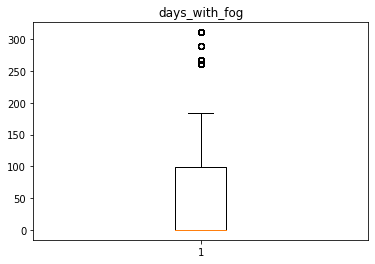

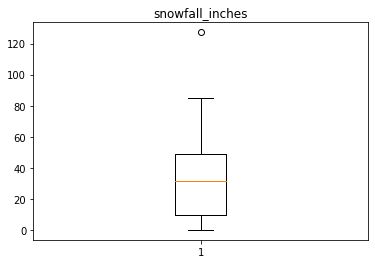

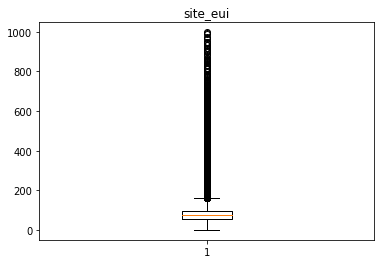

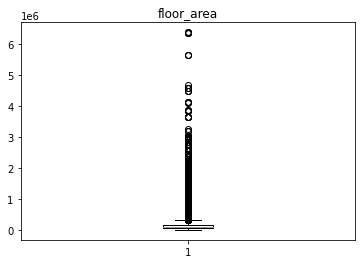

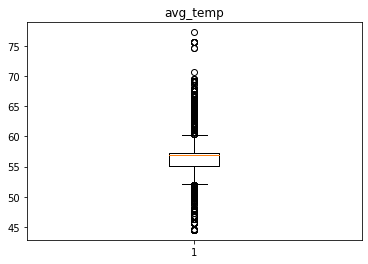

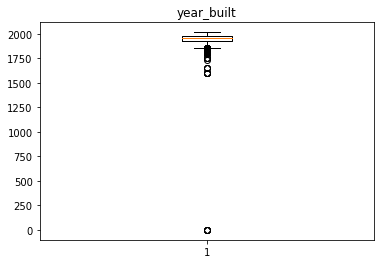

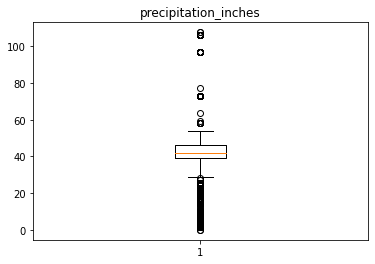

In [163]:
for q in quant:
    plt.boxplot(climate[q])
    plt.title(q)
    plt.show()

### 9.Create thehistogram and check the outliers.

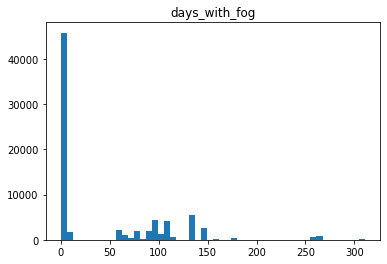

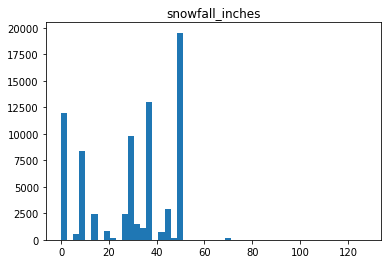

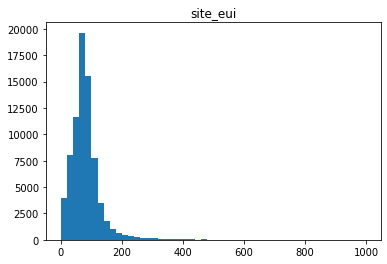

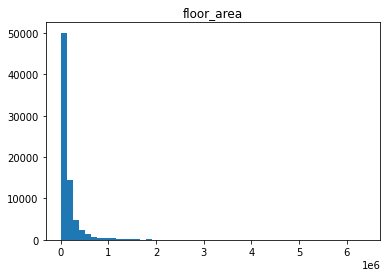

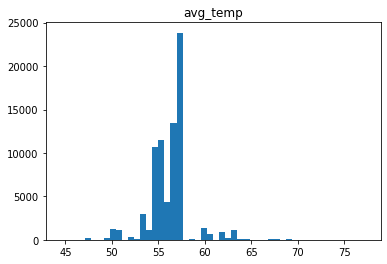

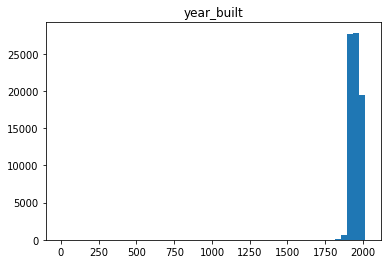

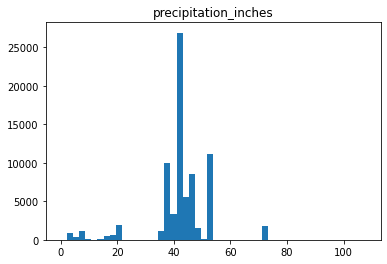

In [168]:
for q in quant:
    plt.hist(climate[q],bins=50)
    plt.title(q)
    plt.show()

### 10.If feature scaling is needed, do it, please.

In [183]:
for q in quant:
    mean = climate[q].mean()
    sd = climate[q].std()
    climate[q]=(climate[q]-mean)/sd

In [184]:
climate

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui,building_class_Commercial,building_class_Residential
0,0,-0.424269,-0.281593,-2.439591,-1.635874,0.355004,-0.694352,2.851156,1,0
1,1,0.437532,0.073582,-2.439591,-1.635874,0.355004,-0.501317,-0.962738,1,0
2,2,0.461937,-0.035702,-2.439591,-1.635874,0.355004,-0.501317,-0.993808,1,0
3,3,-0.448237,0.756613,-2.439591,-1.635874,0.355004,-0.501317,-0.586636,1,0
4,4,-0.404997,0.893219,-2.439591,-1.635874,0.355004,-0.694352,-1.350685,1,0
...,...,...,...,...,...,...,...,...,...,...
75752,75752,-0.589664,1.166431,0.245402,-1.557270,-0.459051,-0.694352,0.864045,1,0
75753,75753,-0.508332,-1.155872,0.245402,-1.557270,-0.459051,-0.694352,-0.739926,0,1
75754,75754,-0.558629,-0.964623,6.031733,0.419048,-3.686764,-0.694352,-0.586807,1,0
75755,75755,-0.455326,1.630891,6.031733,0.419048,-3.686764,-0.694352,8.744858,1,0
